Question 6: Assume linear model and add 0-mean Guassian noise to generate 100 samples and user fit the model along with data

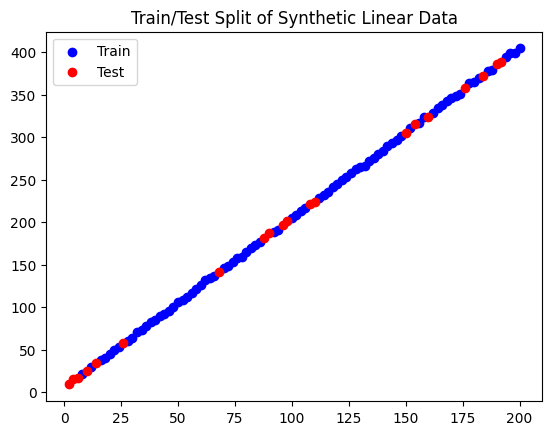

Mean Squared Error on Test Data: 1.0311


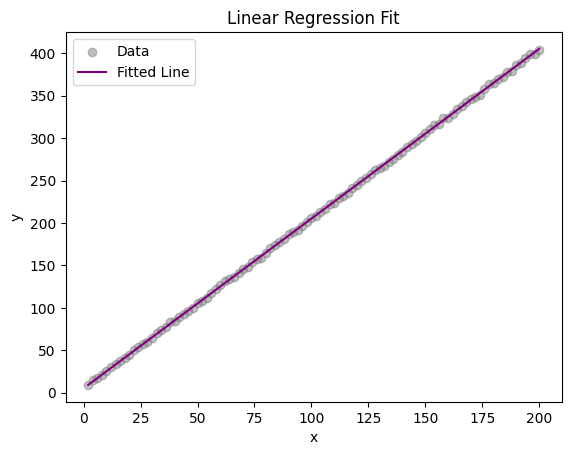

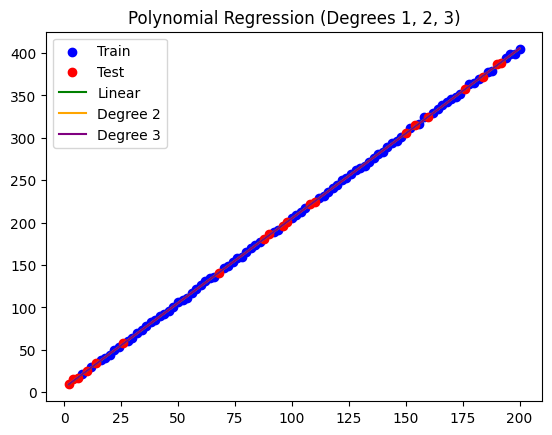

MSE - Linear: 1.0311085816425933
MSE - Degree 2: 0.9832405595230229
MSE - Degree 3: 0.9990998733178718


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(18) # set seed for reproducibility such that it generates same random number at every execution

x=np.linspace(2,200,100).reshape(-1,1) # generates 100 input vales x (sample input) between 2 and 200

# define a true linear relationship between sample input x and output/target y (e.g y=2x+5) and add random noise
true_slope=2
true_intercept=5
noise=np.random.normal(0,1,size=(100,1)) # generates random gaussian noise with mean=0 , std=1

y=true_slope*x+true_intercept+noise

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=18) # split into training and testing sets (80:20)

plt.scatter(x_train,y_train,color='blue',label='Train')
plt.scatter(x_test, y_test, color='red', label='Test')
plt.title("Train/Test Split of Synthetic Linear Data")
plt.legend()
plt.show()

model=LinearRegression() # Initialize the Linear Regression model
model.fit(x_train,y_train) # Train the model using the training data
y_predicted=model.predict(x_test) # Predict the output on test data

mse=mean_squared_error(y_test,y_predicted)
print(f"Mean Squared Error on Test Data: {mse:.4f}")

# Plot the fitted model along with the original data
plt.scatter(x, y, color='gray', label='Data', alpha=0.5)  # All data points
plt.plot(x, model.predict(x), color='purple', label='Fitted Line')  # Fitted regression line
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Degree 2 Polynomial
poly2 = PolynomialFeatures(degree=2)
x_train_poly2 = poly2.fit_transform(x_train)
x_test_poly2 = poly2.transform(x_test)

model_poly2 = LinearRegression()
model_poly2.fit(x_train_poly2, y_train)
y_pred_poly2 = model_poly2.predict(x_test_poly2)
mse_poly2 = mean_squared_error(y_test, y_pred_poly2)

# Degree 3 Polynomial
poly3 = PolynomialFeatures(degree=3)
x_train_poly3 = poly3.fit_transform(x_train)
x_test_poly3 = poly3.transform(x_test)

model_poly3 = LinearRegression()
model_poly3.fit(x_train_poly3, y_train)
y_pred_poly3 = model_poly3.predict(x_test_poly3)
mse_poly3 = mean_squared_error(y_test, y_pred_poly3)

# Plotting all models
x_plot = np.linspace(2, 200, 100).reshape(-1,1)
y_lin_pred = model.predict(x_plot)
y_poly2_pred = model_poly2.predict(poly2.transform(x_plot))
y_poly3_pred = model_poly3.predict(poly3.transform(x_plot))

plt.scatter(x_train, y_train, color='blue', label='Train')
plt.scatter(x_test, y_test, color='red', label='Test')
plt.plot(x_plot, y_lin_pred, color='green', label='Linear')
plt.plot(x_plot, y_poly2_pred, color='orange', label='Degree 2')
plt.plot(x_plot, y_poly3_pred, color='purple', label='Degree 3')
plt.title('Polynomial Regression (Degrees 1, 2, 3)')
plt.legend()
plt.show()

# Print MSEs
print("MSE - Linear:", mean_squared_error(y_test, model.predict(x_test)))
print("MSE - Degree 2:", mse_poly2)
print("MSE - Degree 3:", mse_poly3)


Ques 7


Final weights for learning rate 0.01:
MSE Minimization Weights: [-3.000e-03 -7.305e-01  4.541e-02 -4.675e+02]
Log-Loss Minimization Weights: [-3.000e-03 -7.305e-01  4.541e-02 -4.675e+02]

Final weights for learning rate 0.05:
MSE Minimization Weights: [-1.5000e-02 -3.6525e+00  2.2705e-01 -2.3375e+03]
Log-Loss Minimization Weights: [-1.5000e-02 -3.6525e+00  2.2705e-01 -2.3375e+03]


<ipython-input-11-f66a3edf192e>:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-11-f66a3edf192e>:21: RuntimeWarning: divide by zero encountered in log
  return -1/m * (y @ np.log(h) + (1 - y) @ np.log(1 - h))
<ipython-input-11-f66a3edf192e>:21: RuntimeWarning: invalid value encountered in matmul
  return -1/m * (y @ np.log(h) + (1 - y) @ np.log(1 - h))


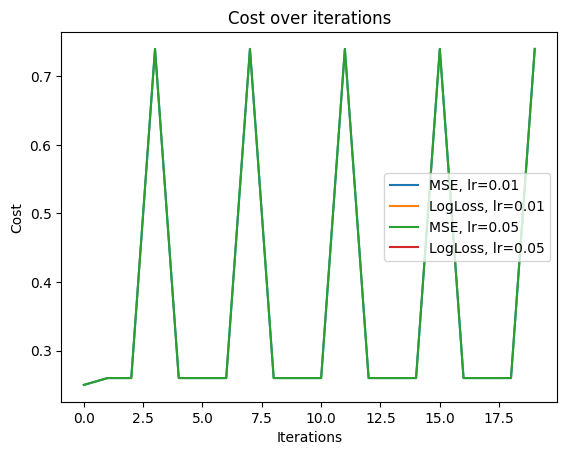

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/A2_P2_ae609303-e3ee-4dc3-85f0-d40fdde4ae63.csv")
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels

# Add intercept (bias) term
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (Log Loss)
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(X.dot(weights))
    return -1/m * (y @ np.log(h) + (1 - y) @ np.log(1 - h))

# Gradient descent for logistic regression
def gradient_descent(X, y, lr, iterations, minimize='mse'):
    weights = np.zeros(X.shape[1])
    cost_history = []

    for i in range(iterations):
        predictions = sigmoid(X.dot(weights))
        if minimize == 'mse':
            gradient = X.T.dot(predictions - y) / len(y)
        elif minimize == 'logloss':
            gradient = X.T.dot(predictions - y) / len(y)

        weights -= lr * gradient

        if minimize == 'mse':
            cost = np.mean((predictions - y) ** 2)
        else:
            cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history

# Run for learning rates 0.01 and 0.05
lrs = [0.01, 0.05]

for lr in lrs:
    # Minimize MSE
    w_mse, mse_cost = gradient_descent(X, y, lr, 20, minimize='mse')
    plt.plot(mse_cost, label=f'MSE, lr={lr}')

    # Maximize Log-Likelihood (equivalent to minimizing log-loss)
    w_log, log_cost = gradient_descent(X, y, lr, 20, minimize='logloss')
    plt.plot(log_cost, label=f'LogLoss, lr={lr}')

    print(f"\nFinal weights for learning rate {lr}:")
    print("MSE Minimization Weights:", w_mse)
    print("Log-Loss Minimization Weights:", w_log)

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost over iterations")
plt.legend()
plt.show()


Ques 8

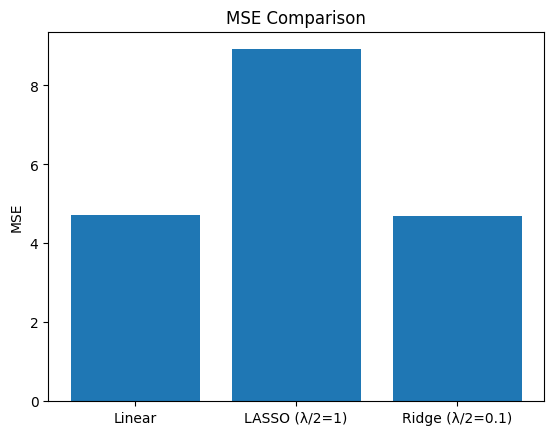

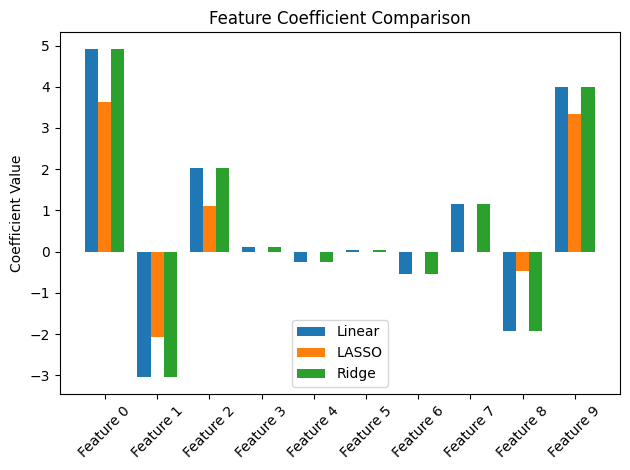

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv("/content/A2_P3_744f5041-4369-44f9-be92-7dacb5a520d7.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Linear": LinearRegression(),
    "LASSO (λ/2=1)": Lasso(alpha=1),
    "Ridge (λ/2=0.1)": Ridge(alpha=0.1)
}

mse_values = {}
weights = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values[name] = mse
    weights[name] = model.coef_

# Plotting MSE
plt.bar(mse_values.keys(), mse_values.values())
plt.ylabel("MSE")
plt.title("MSE Comparison")
plt.show()

# Plotting Coefficients
labels = [f"Feature {i}" for i in range(X.shape[1])]
x = np.arange(len(labels))
width = 0.25

plt.bar(x - width, weights["Linear"], width, label='Linear')
plt.bar(x, weights["LASSO (λ/2=1)"], width, label='LASSO')
plt.bar(x + width, weights["Ridge (λ/2=0.1)"], width, label='Ridge')

plt.ylabel("Coefficient Value")
plt.title("Feature Coefficient Comparison")
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
